# Exercise 2: scikit-learn Decision Trees for Classification & Regression

**Goal:**
1. Classification on Iris: train, tune, evaluate, visualize.
2. Regression on California Housing: train, tune, evaluate.

We use `DecisionTreeClassifier` and `DecisionTreeRegressor` from `scikit-learn`.

## 1. Imports and Settings

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix
import seaborn as sns



## 2. Classification on Iris

In [11]:
# Load Iris
iris = load_iris()
Xc, yc = iris.data, iris.target
# train/test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    Xc, yc, test_size=0.2, random_state=42, stratify=yc)

print("Training samples:", Xc_train.shape[0], "Test samples:", Xc_test.shape[0])


Training samples: 120 Test samples: 30


### 2.1 Grid-search hyperparameters
- `criterion` = 'gini' or 'entropy'
- `max_depth` from 1 to 10
- `min_samples_leaf` = 1, 5, 10

In [12]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1,11)),
    'min_samples_leaf': [1,5,10]
}
clf = DecisionTreeClassifier(random_state=42)
grid_clf = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_clf.fit(Xc_train, yc_train)

print("Best params:", grid_clf.best_params_)
print("Best CV accuracy:", grid_clf.best_score_)

# Evaluate on test set
yc_pred = grid_clf.predict(Xc_test)
acc = accuracy_score(yc_test, yc_pred)
print(f"Test accuracy: {acc:.3f}")


Best params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}
Best CV accuracy: 0.9416666666666668
Test accuracy: 0.933


### 2.2 Confusion Matrix

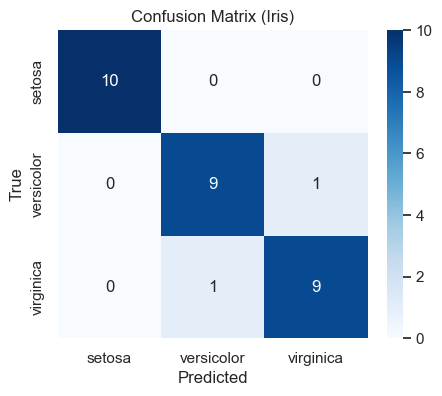

In [13]:
cm = confusion_matrix(yc_test, yc_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Iris)')
plt.show()


### 2.3 Visualize the Best Tree

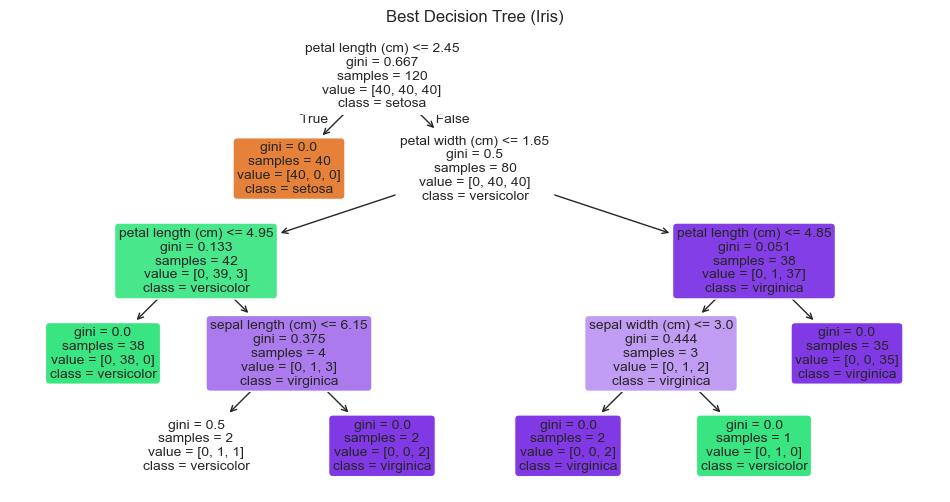

In [14]:
best_clf = grid_clf.best_estimator_
plt.figure(figsize=(12,6))
plot_tree(best_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10)
plt.title('Best Decision Tree (Iris)')
plt.show()


## 3. Regression on California Housing

In [15]:
# Load California housing
cal = fetch_california_housing()
Xr, yr = cal.data, cal.target
# train/test split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=42)
print("Training samples:", Xr_train.shape[0], "Test samples:", Xr_test.shape[0])


Training samples: 16512 Test samples: 4128


### 3.1 Grid-search for Regression Tree
- `max_depth`: 1 to 10
- `min_samples_leaf`: 1, 5, 10

In [16]:
param_grid_r = {
    'max_depth': list(range(1,11)),
    'min_samples_leaf': [1,5,10]
}
regr = DecisionTreeRegressor(random_state=42)
grid_regr = GridSearchCV(regr, param_grid_r, cv=5, n_jobs=-1)
grid_regr.fit(Xr_train, yr_train)

print("Best params:", grid_regr.best_params_)

# test set predictions
yr_pred = grid_regr.predict(Xr_test)

mse = mean_squared_error(yr_test, yr_pred)
mae = mean_absolute_error(yr_test, yr_pred)
print(f"Test MSE = {mse:.3f}, MAE = {mae:.3f}")


Best params: {'max_depth': 10, 'min_samples_leaf': 10}
Test MSE = 0.378, MAE = 0.420


### 3.2 Plot True vs Predicted

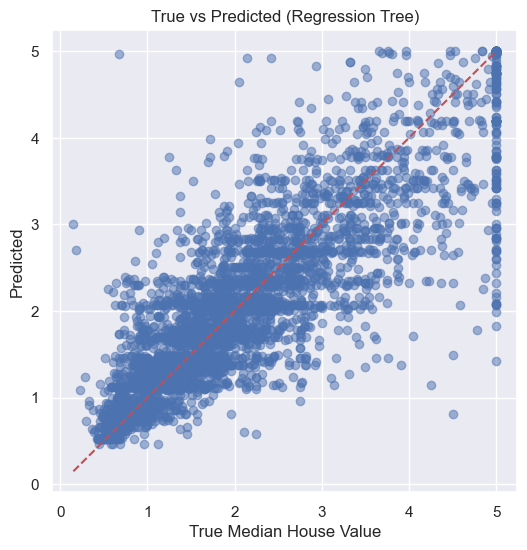

In [17]:
plt.figure(figsize=(6,6))
plt.scatter(yr_test, yr_pred, alpha=0.5)
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted')
plt.title('True vs Predicted (Regression Tree)')
plt.show()


# Key Takeaways

- `DecisionTreeClassifier` with grid-search on Iris achieved high accuracy.
- Visualizing the tree reveals the most important splits.
- `DecisionTreeRegressor` on California Housing: tuning depth & leaf size trades off bias/variance.
- Scatter plot of true vs predicted shows residual structure.

In the next exercise we'll explore Random Forests and ensemble methods.